In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Compose, ToTensor
from torchvision.datasets import MNIST
import torch.nn as nn
from tqdm import tqdm

In [2]:
preprocess = Compose([
    ToTensor()
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=preprocess)
test_dataset = MNIST(root='./data', train=False, download=True, transform=preprocess)

train_data = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [3]:
train_data

In [4]:
data_iter = iter(train_data)
images, labels = next(data_iter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [5]:
labels

tensor([2, 2, 8, 4, 4, 9, 9, 3, 7, 1, 1, 1, 9, 4, 9, 6, 6, 5, 9, 4, 0, 0, 1, 9,
        9, 8, 5, 6, 3, 7, 6, 3, 5, 2, 2, 1, 6, 4, 5, 6, 4, 4, 3, 7, 2, 7, 4, 7,
        8, 3, 1, 1, 7, 6, 8, 3, 7, 3, 2, 1, 7, 8, 8, 8])

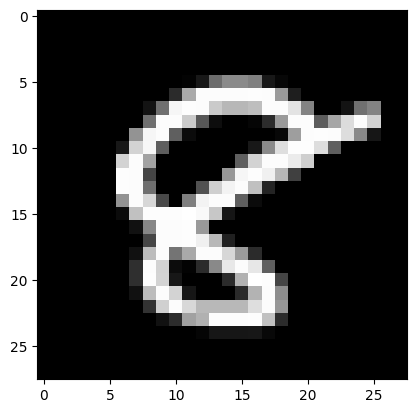

In [6]:
plt.imshow(images[-3].squeeze(), cmap='gray')
plt.show()

In [7]:
BATCH_SIZE = 64
EPOCHS = 10

In [8]:
normal_data = np.array(torch.randn(1000))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 2.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 2., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 2., 1., 1., 0., 0., 0., 1., 1.,
        0., 

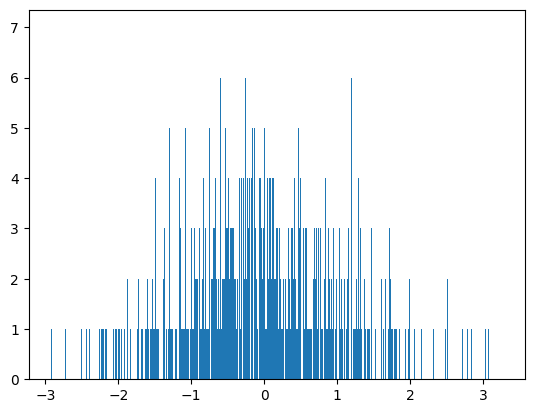

In [9]:
plt.hist(normal_data, bins=len(normal_data))

In [10]:
images[0].shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])


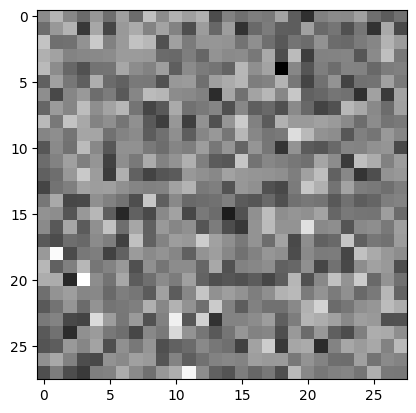

In [11]:
def forward_add_noise(image, timestep):
    noise = torch.randn(image.shape)
    # noise = torch.randn_like(image)
    return noise


noise = forward_add_noise(images[0], 1)
print(noise.shape)
plt.imshow(noise.squeeze(), cmap='gray')
plt.show()


In [12]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.002, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

In [13]:
alphas_cumprod

array([0.9999    , 0.99979043, 0.99967134, 0.9995428 , 0.99940467,
       0.99925697, 0.9990998 , 0.99893314, 0.99875695, 0.9985713 ,
       0.9983761 , 0.9981714 , 0.9979572 , 0.9977336 , 0.9975005 ,
       0.9972579 , 0.9970058 , 0.9967443 , 0.9964733 , 0.99619293,
       0.99590313, 0.99560386, 0.99529517, 0.99497706, 0.9946496 ,
       0.9943127 , 0.9939664 , 0.99361074, 0.9932457 , 0.9928714 ,
       0.9924877 , 0.99209476, 0.9916924 , 0.9912808 , 0.99085987,
       0.9904297 , 0.98999023, 0.9895415 , 0.98908347, 0.9886163 ,
       0.98813987, 0.98765427, 0.9871595 , 0.9866555 , 0.9861423 ,
       0.98561996, 0.9850885 , 0.984548  , 0.9839983 , 0.9834395 ,
       0.98287165, 0.9822948 , 0.9817089 , 0.981114  , 0.98051   ,
       0.979897  , 0.9792751 , 0.97864425, 0.97800446, 0.9773557 ,
       0.9766981 , 0.9760316 , 0.9753562 , 0.974672  , 0.97397894,
       0.9732771 , 0.9725664 , 0.971847  , 0.97111887, 0.97038203,
       0.96963644, 0.96888214, 0.9681192 , 0.9673476 , 0.96656

In [14]:
def forward(x0, t):
    noise = torch.randn((28,28))
    a_bar = np.array(alphas_cumprod[t])
    a_bar = torch.from_numpy(a_bar)
    a_bar = a_bar.reshape((1,1,1,1))
    out = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise

    return out 

noisy_img = forward(images[8].squeeze(), 50)
print(noisy_img.shape)

torch.Size([1, 1, 28, 28])


10


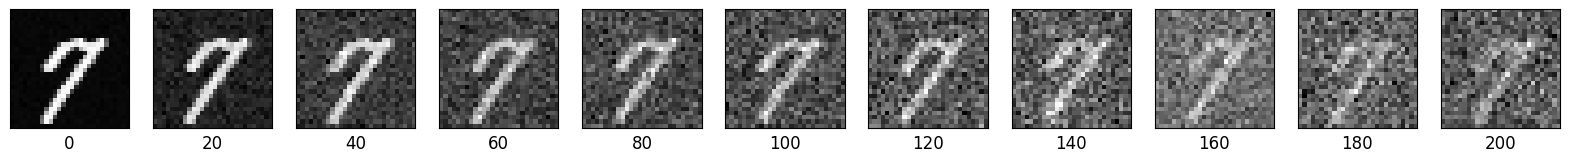

In [15]:
imgs = []
for i in range(10):
    imgs.append(torch.squeeze(forward(images[8], i*20)))
print(len(imgs))
imgs.append(torch.squeeze(forward(images[8], 199)))


plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, 11, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()

In [16]:
print(imgs[-1].mean())
print(imgs[-1].std())

tensor(0.1195)
tensor(0.4923)


10


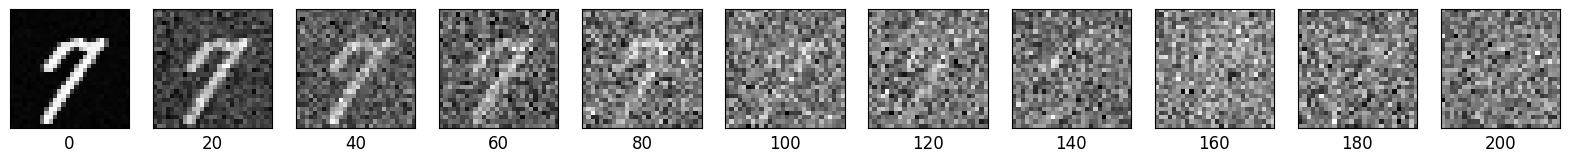

In [17]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.02, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

imgs = []
for i in range(10):
    imgs.append(torch.squeeze(forward(images[8], i*20)))
print(len(imgs))
imgs.append(torch.squeeze(forward(images[8], 199)))


plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, 11, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()

In [18]:
print(imgs[-1].mean())
print(imgs[-1].std())

tensor(0.0049)
tensor(0.9435)


### Model

In [19]:
class simpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 1, 3, padding=1)
        self.relu = nn.ReLU()


    def forward(self, x, t):
        t = t[:, None, None, None].float() / T
        x = x + t
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)

        return x
    

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [21]:
model = simpleUNet().to(device=device)

In [22]:
print(model)

simpleUNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)


In [23]:
model.train()

simpleUNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)

In [24]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.002, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)


In [25]:
import torch.nn.functional as F
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
alphas_cumprod = torch.tensor(alphas_cumprod, dtype=torch.float32).to(device)

In [26]:
def q_sample(x0, t, noise):
    # noise = torch.randn((28,28))
    a_bar = alphas_cumprod[t]
    
    # a_bar = torch.from_numpy(a_bar)
    a_bar = a_bar.reshape((-1,1,1,1))
    out = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise

    # plt.imshow(out[0].cpu().numpy().squeeze(), cmap='gray')
    # plt.show()    
    return out 

In [27]:
for epoch in range(EPOCHS):
    pbar = tqdm(train_data)
    for x, _ in pbar:
        x = x.to(device)
        t = torch.randint(0, T, (x.size(0),), device=device)
        noise = torch.randn((x.size(0), 1, 28, 28), device=device)
        # noise = torch.randn_like(x)
        x_t = q_sample(x, t, noise)
        noise_pred = model(x_t, t)
        # print(noise_pred)
        # plt.imshow(noise_pred[0].cpu().detach().numpy().squeeze(), cmap='gray')
        # plt.show()
        loss = F.mse_loss(noise_pred, noise)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.set_description(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1 | Loss: 0.1191: 100%|██████████| 938/938 [00:13<00:00, 70.83it/s]
Epoch 2 | Loss: 0.0982: 100%|██████████| 938/938 [00:12<00:00, 74.34it/s]
Epoch 3 | Loss: 0.0917: 100%|██████████| 938/938 [00:12<00:00, 75.13it/s]
Epoch 4 | Loss: 0.0954: 100%|██████████| 938/938 [00:12<00:00, 74.46it/s]
Epoch 5 | Loss: 0.1074: 100%|██████████| 938/938 [00:13<00:00, 70.25it/s]
Epoch 6 | Loss: 0.0924: 100%|██████████| 938/938 [00:13<00:00, 68.50it/s]
Epoch 7 | Loss: 0.0940: 100%|██████████| 938/938 [00:13<00:00, 70.60it/s]
Epoch 8 | Loss: 0.0708: 100%|██████████| 938/938 [00:10<00:00, 86.69it/s]
Epoch 9 | Loss: 0.0963: 100%|██████████| 938/938 [00:10<00:00, 91.61it/s]
Epoch 10 | Loss: 0.0976: 100%|██████████| 938/938 [00:10<00:00, 86.16it/s]


In [ ]:
@torch.no_grad()
def sample_ddpm(n_samples):
    x = torch.randn(n_samples, 1, 28, 28).to(device)
    for t_ in reversed(range(T)):
        t = torch.full((n_samples,), t_, device=device, dtype=torch.long)
        x = p_sample(x, t)
    return x

@torch.no_grad()
def p_sample(x, t):
    beta_t = betas[t].view(-1, 1, 1, 1)
    sqrt_one_minus_alpha = sqrt_one_minus_alphas_cumprod[t].view(-1, 1, 1, 1)
    sqrt_recip_alpha = (1. / torch.sqrt(alphas[t])).view(-1, 1, 1, 1)

    noise_pred = model(x, t)
    model_mean = sqrt_recip_alpha * (x - beta_t * noise_pred / sqrt_one_minus_alpha)

    if t[0] == 0:
        return model_mean
    else:
        noise = torch.randn_like(x)
        sigma = torch.sqrt(betas[t]).view(-1, 1, 1, 1)
        return model_mean + sigma * noise


In [49]:
import warnings
warnings.filterwarnings('ignore')

199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


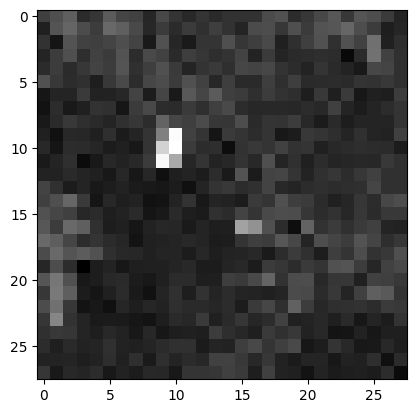

In [ ]:
@torch.no_grad()
def p_sample(x, t):
    noise_pred = model(x, t)

    sqrt_reverse_alpha = 1 / torch.sqrt(torch.tensor(alphas[t])) #.view(-1, 1, 1, 1).to(device)
    # print(sqrt_reverse_alpha)
    beta_t = torch.tensor(betas[t])
    # print(beta_t)
    radical_one_minus_alpha_bar_t = torch.sqrt(1 - torch.tensor(alphas_cumprod[t]))
    # print(radical_one_minus_alpha_bar_t)
    sigma = torch.sqrt(torch.tensor(betas[t])).to(device)
    # print(sigma)
    noise = torch.randn_like(x, device=device)
    # print(noise)
    image = sqrt_reverse_alpha * (x - ((beta_t*noise_pred)/radical_one_minus_alpha_bar_t)) + sigma*noise

    # print(image.shape)
    return image



@torch.no_grad()
def create_image():
    x = torch.randn(1, 28, 28).to(device)
    
    for i in reversed(range(T)):
        t = torch.tensor([i]).to(device)
        x = p_sample(x, t)
        print(i)

    return x
        



sample_T = create_image()
# print(sample_T)
plt.imshow(sample_T.cpu().squeeze(), cmap='gray')
plt.show()